In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
image_dim=32 #give the image a dimension&it's const. 32 or 64

In [2]:
def parse_function(filenames): #bta5od el filename w btrg3ly el sora 
    #print(filename.label) 
    image_string=tf.read_file(filenames)
    
    #don't use tf.image.decode_image, or output shape will not be defined
    image=tf.image.decode_png(image_string,channels=3 )#for RGB #watchout for the comment
    
    #this will convert to float vals. in [0,1]
    image=tf.image.convert_image_dtype(image,tf.float32)
    
    resized_image=tf.image.resize_images(image,[image_dim,image_dim])
    return resized_image #,label

In [3]:
def train_preprocess(image): #shwyt 3mlyat btt3ml 3la el sora 3shan el training
    image = tf.image.random_flip_left_right(image)
    image = tf.image.random_brightness(image,max_delta=32.0/255.0) #why?
    image = tf.image.random_saturation(image, lower=0.5,upper=1.5)
    
    #Make sure the image is still in [0,1]
    image=tf.clip_by_value(image, 0.0, 1.0)
    
    return image #,label
#shift+enter

In [4]:
def read_data(filenames):
    dataset  = tf.data.Dataset.from_tensor_slices((filenames))
    dataset  = dataset.map(parse_function)
    dataset  = dataset.map(train_preprocess)
    iterator = dataset.make_one_shot_iterator()
    return iterator
#shift+enter

In [5]:
def build_training(filenames):
    X=np.zeros((len(filenames),image_dim,image_dim,3))
    iterator =read_data(filenames)
    next_element = iterator.get_next()
    with tf.Session() as sess:
        for i in range(len(filenames)):
            image_example=sess.run(next_element)
            X[i,:,:]=image_example[:,:,:]
    return X
#shift+enter

In [7]:
#import tensorflow as tf #we've already done that before so it's optional :)
filenames=['A_1.jpg','A_2.jpg','A_3.jpg','A_4.jpg','A_5.jpg','A_6.jpg','A_7.jpg','A_8.jpg','A_9.jpg','A_10.jpg',
          'B_1.jpg','B_2.jpg','B_3.jpg','B_4.jpg','B_5.jpg','B_6.jpg','B_7.jpg','B_8.jpg','B_9.jpg','B_10.jpg',
          'C_1.jpg','C_2.jpg','C_3.jpg','C_4.jpg','C_5.jpg','C_6.jpg','C_7.jpg','C_8.jpg','C_9.jpg','C_10.jpg',
          'D_1.jpg','D_2.jpg','D_3.jpg','D_4.jpg','D_5.jpg','D_6.jpg','D_7.jpg','D_8.jpg','D_9.jpg','D_10.jpg',
          'E_1.jpg','E_2.jpg','E_3.jpg','E_4.jpg','E_5.jpg','E_6.jpg','E_7.jpg','E_8.jpg','E_9.jpg','E_10.jpg',
          'F_1.jpg','F_2.jpg','F_3.jpg','F_4.jpg','F_5.jpg','F_6.jpg','F_7.jpg','F_8.jpg','F_9.jpg','F_10.jpg',
          'G_1.jpg','G_2.jpg','G_3.jpg','G_4.jpg','G_5.jpg','G_6.jpg','G_7.jpg','G_8.jpg','G_9.jpg','G_10.jpg',
          'H_1.jpg','H_2.jpg','H_3.jpg','H_4.jpg','H_5.jpg','H_6.jpg','H_7.jpg','H_8.jpg','H_9.jpg','H_10.jpg',
          'I_1.jpg','I_2.jpg','I_3.jpg','I_4.jpg','I_5.jpg','I_6.jpg','I_7.jpg','I_8.jpg','I_9.jpg','I_10.jpg',
          'J_1.jpg','J_2.jpg','J_3.jpg','J_4.jpg','J_5.jpg','J_6.jpg','J_7.jpg','J_8.jpg','J_9.jpg','J_10.jpg']#enter filenames of imgs
Y=np.array([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41
           ,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80
           ,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99])
X=build_training(filenames)

model = tf.keras.models.Sequential([
    tf.keras.layers.Flatten(), #btrg3haly msfofa f bo3d wa7d
    tf.keras.layers.Dense(image_dim*image_dim*3,activation=tf.nn.relu),
    tf.keras.layers.Dropout(0.9), #optional h5tr3 rqm random msln 0.7 w ana mdelo rqm w yrg3 yshof yqarn bl rqm elly mdeholo lw tl3 2kbr mno yrg3 blneuron w lw 2s8r hyrg3 b zero
    tf.keras.layers.Dense(100,activation=tf.nn.softmax) #number of classes,act func of classification
])

model.compile(optimizer=tf.train.GradientDescentOptimizer(learning_rate=1e-3) #0.01) 
              ,loss='sparse_categorical_crossentropy',  metrics=['accuracy'])

model.fit(X, Y, epochs=6000,batch_size=100) #between 1000 & 10000
                              
model.summary()                              

model.evaluate(X,Y)

Epoch 1/6000
100/100 [==============================] - 1s 14ms/step - loss: 4.7840 - acc: 0.0100
Epoch 2/6000
100/100 [==============================] - 0s 2ms/step - loss: 4.7764 - acc: 0.0100
Epoch 3/6000
100/100 [==============================] - 0s 2ms/step - loss: 4.7692 - acc: 0.0100
Epoch 4/6000
100/100 [==============================] - 0s 2ms/step - loss: 4.7624 - acc: 0.0100
Epoch 5/6000
100/100 [==============================] - 0s 2ms/step - loss: 4.7559 - acc: 0.0100
Epoch 6/6000
100/100 [==============================] - 0s 2ms/step - loss: 4.7498 - acc: 0.0100
Epoch 7/6000
100/100 [==============================] - 0s 1ms/step - loss: 4.7440 - acc: 0.0100
Epoch 8/6000
100/100 [==============================] - 0s 1ms/step - loss: 4.7385 - acc: 0.0100
Epoch 9/6000
100/100 [==============================] - 0s 1ms/step - loss: 4.7333 - acc: 0.0100
Epoch 10/6000
100/100 [==============================] - 0s 1ms/step - loss: 4.7282 - acc: 0.0100
Epoch 11/6000
100/100 [=====

Epoch 84/6000
100/100 [==============================] - 0s 870us/step - loss: 4.5903 - acc: 0.0100
Epoch 85/6000
100/100 [==============================] - 0s 800us/step - loss: 4.5896 - acc: 0.0000e+00
Epoch 86/6000
100/100 [==============================] - 0s 810us/step - loss: 4.5890 - acc: 0.0000e+00
Epoch 87/6000
100/100 [==============================] - 0s 780us/step - loss: 4.5884 - acc: 0.0000e+00
Epoch 88/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5878 - acc: 0.0000e+00
Epoch 89/6000
100/100 [==============================] - 0s 790us/step - loss: 4.5872 - acc: 0.0000e+00
Epoch 90/6000
100/100 [==============================] - 0s 820us/step - loss: 4.5866 - acc: 0.0000e+00
Epoch 91/6000
100/100 [==============================] - 0s 760us/step - loss: 4.5860 - acc: 0.0000e+00
Epoch 92/6000
100/100 [==============================] - 0s 800us/step - loss: 4.5854 - acc: 0.0000e+00
Epoch 93/6000
100/100 [==============================] - 0s 820us/st

Epoch 164/6000
100/100 [==============================] - 0s 830us/step - loss: 4.5605 - acc: 0.0100
Epoch 165/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5603 - acc: 0.0100
Epoch 166/6000
100/100 [==============================] - 0s 810us/step - loss: 4.5600 - acc: 0.0100
Epoch 167/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5598 - acc: 0.0100
Epoch 168/6000
100/100 [==============================] - 0s 780us/step - loss: 4.5596 - acc: 0.0100
Epoch 169/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5594 - acc: 0.0100
Epoch 170/6000
100/100 [==============================] - 0s 800us/step - loss: 4.5591 - acc: 0.0100
Epoch 171/6000
100/100 [==============================] - 0s 790us/step - loss: 4.5589 - acc: 0.0100
Epoch 172/6000
100/100 [==============================] - 0s 780us/step - loss: 4.5587 - acc: 0.0100
Epoch 173/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5585 - ac

100/100 [==============================] - 0s 870us/step - loss: 4.5444 - acc: 0.0100
Epoch 246/6000
100/100 [==============================] - 0s 850us/step - loss: 4.5443 - acc: 0.0100
Epoch 247/6000
100/100 [==============================] - 0s 780us/step - loss: 4.5441 - acc: 0.0100
Epoch 248/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5439 - acc: 0.0100
Epoch 249/6000
100/100 [==============================] - 0s 780us/step - loss: 4.5437 - acc: 0.0100
Epoch 250/6000
100/100 [==============================] - 0s 800us/step - loss: 4.5436 - acc: 0.0100
Epoch 251/6000
100/100 [==============================] - 0s 800us/step - loss: 4.5434 - acc: 0.0100
Epoch 252/6000
100/100 [==============================] - 0s 790us/step - loss: 4.5432 - acc: 0.0100
Epoch 253/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5430 - acc: 0.0100
Epoch 254/6000
100/100 [==============================] - 0s 800us/step - loss: 4.5428 - acc: 0.0100
Epoch

Epoch 327/6000
100/100 [==============================] - 0s 810us/step - loss: 4.5308 - acc: 0.0100
Epoch 328/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5306 - acc: 0.0100
Epoch 329/6000
100/100 [==============================] - 0s 780us/step - loss: 4.5305 - acc: 0.0100
Epoch 330/6000
100/100 [==============================] - 0s 760us/step - loss: 4.5303 - acc: 0.0100
Epoch 331/6000
100/100 [==============================] - 0s 790us/step - loss: 4.5301 - acc: 0.0100
Epoch 332/6000
100/100 [==============================] - 0s 750us/step - loss: 4.5300 - acc: 0.0100
Epoch 333/6000
100/100 [==============================] - 0s 780us/step - loss: 4.5298 - acc: 0.0100
Epoch 334/6000
100/100 [==============================] - 0s 750us/step - loss: 4.5296 - acc: 0.0100
Epoch 335/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5295 - acc: 0.0100
Epoch 336/6000
100/100 [==============================] - 0s 750us/step - loss: 4.5293 - ac

100/100 [==============================] - 0s 810us/step - loss: 4.5179 - acc: 0.0200
Epoch 409/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5178 - acc: 0.0200
Epoch 410/6000
100/100 [==============================] - 0s 780us/step - loss: 4.5176 - acc: 0.0200
Epoch 411/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5175 - acc: 0.0200
Epoch 412/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5173 - acc: 0.0200
Epoch 413/6000
100/100 [==============================] - 0s 760us/step - loss: 4.5172 - acc: 0.0200
Epoch 414/6000
100/100 [==============================] - 0s 790us/step - loss: 4.5170 - acc: 0.0200
Epoch 415/6000
100/100 [==============================] - 0s 780us/step - loss: 4.5168 - acc: 0.0200
Epoch 416/6000
100/100 [==============================] - 0s 780us/step - loss: 4.5167 - acc: 0.0200
Epoch 417/6000
100/100 [==============================] - 0s 800us/step - loss: 4.5165 - acc: 0.0200
Epoch

Epoch 490/6000
100/100 [==============================] - 0s 790us/step - loss: 4.5052 - acc: 0.0300
Epoch 491/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5051 - acc: 0.0300
Epoch 492/6000
100/100 [==============================] - 0s 800us/step - loss: 4.5049 - acc: 0.0300
Epoch 493/6000
100/100 [==============================] - 0s 790us/step - loss: 4.5048 - acc: 0.0300
Epoch 494/6000
100/100 [==============================] - 0s 790us/step - loss: 4.5046 - acc: 0.0300
Epoch 495/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5045 - acc: 0.0300
Epoch 496/6000
100/100 [==============================] - 0s 780us/step - loss: 4.5043 - acc: 0.0300
Epoch 497/6000
100/100 [==============================] - 0s 770us/step - loss: 4.5042 - acc: 0.0300
Epoch 498/6000
100/100 [==============================] - 0s 750us/step - loss: 4.5040 - acc: 0.0300
Epoch 499/6000
100/100 [==============================] - 0s 790us/step - loss: 4.5039 - ac

100/100 [==============================] - 0s 810us/step - loss: 4.4931 - acc: 0.0300
Epoch 572/6000
100/100 [==============================] - 0s 790us/step - loss: 4.4930 - acc: 0.0300
Epoch 573/6000
100/100 [==============================] - 0s 780us/step - loss: 4.4928 - acc: 0.0300
Epoch 574/6000
100/100 [==============================] - 0s 780us/step - loss: 4.4927 - acc: 0.0300
Epoch 575/6000
100/100 [==============================] - 0s 780us/step - loss: 4.4925 - acc: 0.0300
Epoch 576/6000
100/100 [==============================] - 0s 770us/step - loss: 4.4924 - acc: 0.0300
Epoch 577/6000
100/100 [==============================] - 0s 790us/step - loss: 4.4922 - acc: 0.0300
Epoch 578/6000
100/100 [==============================] - 0s 780us/step - loss: 4.4921 - acc: 0.0400
Epoch 579/6000
100/100 [==============================] - 0s 790us/step - loss: 4.4919 - acc: 0.0400
Epoch 580/6000
100/100 [==============================] - 0s 790us/step - loss: 4.4918 - acc: 0.0400
Epoch

Epoch 653/6000
100/100 [==============================] - 0s 810us/step - loss: 4.4810 - acc: 0.0800
Epoch 654/6000
100/100 [==============================] - 0s 780us/step - loss: 4.4808 - acc: 0.0800
Epoch 655/6000
100/100 [==============================] - 0s 780us/step - loss: 4.4807 - acc: 0.0800
Epoch 656/6000
100/100 [==============================] - 0s 820us/step - loss: 4.4805 - acc: 0.0800
Epoch 657/6000
100/100 [==============================] - 0s 790us/step - loss: 4.4804 - acc: 0.0800
Epoch 658/6000
100/100 [==============================] - 0s 770us/step - loss: 4.4802 - acc: 0.0800
Epoch 659/6000
100/100 [==============================] - 0s 830us/step - loss: 4.4801 - acc: 0.0800
Epoch 660/6000
100/100 [==============================] - 0s 800us/step - loss: 4.4799 - acc: 0.0800
Epoch 661/6000
100/100 [==============================] - 0s 770us/step - loss: 4.4798 - acc: 0.0800
Epoch 662/6000
100/100 [==============================] - 0s 790us/step - loss: 4.4796 - ac

Epoch 735/6000
100/100 [==============================] - 0s 790us/step - loss: 4.4688 - acc: 0.0800
Epoch 736/6000
100/100 [==============================] - 0s 790us/step - loss: 4.4687 - acc: 0.0800
Epoch 737/6000
100/100 [==============================] - 0s 820us/step - loss: 4.4685 - acc: 0.0800
Epoch 738/6000
100/100 [==============================] - 0s 790us/step - loss: 4.4684 - acc: 0.0800
Epoch 739/6000
100/100 [==============================] - 0s 830us/step - loss: 4.4682 - acc: 0.0800
Epoch 740/6000
100/100 [==============================] - 0s 880us/step - loss: 4.4681 - acc: 0.0800
Epoch 741/6000
100/100 [==============================] - 0s 880us/step - loss: 4.4679 - acc: 0.0800
Epoch 742/6000
100/100 [==============================] - 0s 910us/step - loss: 4.4678 - acc: 0.0800
Epoch 743/6000
100/100 [==============================] - 0s 800us/step - loss: 4.4676 - acc: 0.0800
Epoch 744/6000
100/100 [==============================] - 0s 930us/step - loss: 4.4675 - ac

100/100 [==============================] - 0s 870us/step - loss: 4.4569 - acc: 0.0800
Epoch 817/6000
100/100 [==============================] - 0s 760us/step - loss: 4.4567 - acc: 0.0800
Epoch 818/6000
100/100 [==============================] - 0s 760us/step - loss: 4.4566 - acc: 0.0800
Epoch 819/6000
100/100 [==============================] - 0s 820us/step - loss: 4.4564 - acc: 0.0800
Epoch 820/6000
100/100 [==============================] - 0s 820us/step - loss: 4.4563 - acc: 0.0800
Epoch 821/6000
100/100 [==============================] - 0s 850us/step - loss: 4.4561 - acc: 0.0800
Epoch 822/6000
100/100 [==============================] - 0s 870us/step - loss: 4.4560 - acc: 0.0800
Epoch 823/6000
100/100 [==============================] - 0s 800us/step - loss: 4.4558 - acc: 0.0800
Epoch 824/6000
100/100 [==============================] - 0s 830us/step - loss: 4.4557 - acc: 0.0800
Epoch 825/6000
100/100 [==============================] - 0s 850us/step - loss: 4.4555 - acc: 0.0900
Epoch

Epoch 898/6000
100/100 [==============================] - 0s 810us/step - loss: 4.4448 - acc: 0.1000
Epoch 899/6000
100/100 [==============================] - 0s 820us/step - loss: 4.4447 - acc: 0.1000
Epoch 900/6000
100/100 [==============================] - 0s 820us/step - loss: 4.4445 - acc: 0.1000
Epoch 901/6000
100/100 [==============================] - 0s 830us/step - loss: 4.4444 - acc: 0.1000
Epoch 902/6000
100/100 [==============================] - 0s 850us/step - loss: 4.4442 - acc: 0.1000
Epoch 903/6000
100/100 [==============================] - 0s 820us/step - loss: 4.4441 - acc: 0.1000
Epoch 904/6000
100/100 [==============================] - 0s 830us/step - loss: 4.4440 - acc: 0.1000
Epoch 905/6000
100/100 [==============================] - 0s 850us/step - loss: 4.4438 - acc: 0.1000
Epoch 906/6000
100/100 [==============================] - 0s 810us/step - loss: 4.4437 - acc: 0.1000
Epoch 907/6000
100/100 [==============================] - 0s 830us/step - loss: 4.4435 - ac

100/100 [==============================] - 0s 800us/step - loss: 4.4331 - acc: 0.1700
Epoch 980/6000
100/100 [==============================] - 0s 790us/step - loss: 4.4329 - acc: 0.1700
Epoch 981/6000
100/100 [==============================] - 0s 790us/step - loss: 4.4328 - acc: 0.1700
Epoch 982/6000
100/100 [==============================] - 0s 800us/step - loss: 4.4327 - acc: 0.1700
Epoch 983/6000
100/100 [==============================] - 0s 870us/step - loss: 4.4325 - acc: 0.1800
Epoch 984/6000
100/100 [==============================] - 0s 780us/step - loss: 4.4324 - acc: 0.1800
Epoch 985/6000
100/100 [==============================] - 0s 810us/step - loss: 4.4322 - acc: 0.1800
Epoch 986/6000
100/100 [==============================] - 0s 810us/step - loss: 4.4321 - acc: 0.1800
Epoch 987/6000
100/100 [==============================] - 0s 830us/step - loss: 4.4319 - acc: 0.1800
Epoch 988/6000
100/100 [==============================] - 0s 810us/step - loss: 4.4318 - acc: 0.1800
Epoch

Epoch 1060/6000
100/100 [==============================] - 0s 800us/step - loss: 4.4215 - acc: 0.2100
Epoch 1061/6000
100/100 [==============================] - 0s 780us/step - loss: 4.4214 - acc: 0.2100
Epoch 1062/6000
100/100 [==============================] - 0s 790us/step - loss: 4.4212 - acc: 0.2100
Epoch 1063/6000
100/100 [==============================] - 0s 760us/step - loss: 4.4211 - acc: 0.2100
Epoch 1064/6000
100/100 [==============================] - 0s 770us/step - loss: 4.4210 - acc: 0.2100
Epoch 1065/6000
100/100 [==============================] - 0s 770us/step - loss: 4.4208 - acc: 0.2100
Epoch 1066/6000
100/100 [==============================] - 0s 770us/step - loss: 4.4207 - acc: 0.2100
Epoch 1067/6000
100/100 [==============================] - 0s 760us/step - loss: 4.4205 - acc: 0.2100
Epoch 1068/6000
100/100 [==============================] - 0s 780us/step - loss: 4.4204 - acc: 0.2100
Epoch 1069/6000
100/100 [==============================] - 0s 780us/step - loss: 4

Epoch 1141/6000
100/100 [==============================] - 0s 790us/step - loss: 4.4101 - acc: 0.2300
Epoch 1142/6000
100/100 [==============================] - 0s 790us/step - loss: 4.4099 - acc: 0.2300
Epoch 1143/6000
100/100 [==============================] - 0s 780us/step - loss: 4.4098 - acc: 0.2300
Epoch 1144/6000
100/100 [==============================] - 0s 800us/step - loss: 4.4096 - acc: 0.2300
Epoch 1145/6000
100/100 [==============================] - 0s 800us/step - loss: 4.4095 - acc: 0.2300
Epoch 1146/6000
100/100 [==============================] - 0s 760us/step - loss: 4.4093 - acc: 0.2300
Epoch 1147/6000
100/100 [==============================] - 0s 800us/step - loss: 4.4092 - acc: 0.2300
Epoch 1148/6000
100/100 [==============================] - 0s 840us/step - loss: 4.4091 - acc: 0.2300
Epoch 1149/6000
100/100 [==============================] - 0s 770us/step - loss: 4.4089 - acc: 0.2300
Epoch 1150/6000
100/100 [==============================] - 0s 800us/step - loss: 4

Epoch 1222/6000
100/100 [==============================] - 0s 850us/step - loss: 4.3986 - acc: 0.2800
Epoch 1223/6000
100/100 [==============================] - 0s 830us/step - loss: 4.3985 - acc: 0.2800
Epoch 1224/6000
100/100 [==============================] - 0s 810us/step - loss: 4.3983 - acc: 0.2800
Epoch 1225/6000
100/100 [==============================] - 0s 800us/step - loss: 4.3982 - acc: 0.2800
Epoch 1226/6000
100/100 [==============================] - 0s 800us/step - loss: 4.3981 - acc: 0.2800
Epoch 1227/6000
100/100 [==============================] - 0s 820us/step - loss: 4.3979 - acc: 0.2800
Epoch 1228/6000
100/100 [==============================] - 0s 830us/step - loss: 4.3978 - acc: 0.2800
Epoch 1229/6000
100/100 [==============================] - 0s 840us/step - loss: 4.3977 - acc: 0.2800
Epoch 1230/6000
100/100 [==============================] - 0s 830us/step - loss: 4.3975 - acc: 0.2800
Epoch 1231/6000
100/100 [==============================] - 0s 840us/step - loss: 4

Epoch 1303/6000
100/100 [==============================] - 0s 870us/step - loss: 4.3873 - acc: 0.2800
Epoch 1304/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3871 - acc: 0.2800
Epoch 1305/6000
100/100 [==============================] - 0s 800us/step - loss: 4.3870 - acc: 0.2800
Epoch 1306/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3869 - acc: 0.2800
Epoch 1307/6000
100/100 [==============================] - 0s 810us/step - loss: 4.3867 - acc: 0.2800
Epoch 1308/6000
100/100 [==============================] - 0s 810us/step - loss: 4.3866 - acc: 0.2800
Epoch 1309/6000
100/100 [==============================] - 0s 840us/step - loss: 4.3864 - acc: 0.2800
Epoch 1310/6000
100/100 [==============================] - 0s 780us/step - loss: 4.3863 - acc: 0.2800
Epoch 1311/6000
100/100 [==============================] - 0s 780us/step - loss: 4.3862 - acc: 0.2800
Epoch 1312/6000
100/100 [==============================] - 0s 790us/step - loss: 4

Epoch 1384/6000
100/100 [==============================] - 0s 800us/step - loss: 4.3760 - acc: 0.3000
Epoch 1385/6000
100/100 [==============================] - 0s 760us/step - loss: 4.3759 - acc: 0.3000
Epoch 1386/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3757 - acc: 0.3000
Epoch 1387/6000
100/100 [==============================] - 0s 770us/step - loss: 4.3756 - acc: 0.3000
Epoch 1388/6000
100/100 [==============================] - 0s 760us/step - loss: 4.3754 - acc: 0.3000
Epoch 1389/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3753 - acc: 0.3000
Epoch 1390/6000
100/100 [==============================] - 0s 830us/step - loss: 4.3752 - acc: 0.3100
Epoch 1391/6000
100/100 [==============================] - 0s 830us/step - loss: 4.3750 - acc: 0.3000
Epoch 1392/6000
100/100 [==============================] - 0s 810us/step - loss: 4.3749 - acc: 0.3100
Epoch 1393/6000
100/100 [==============================] - 0s 830us/step - loss: 4

Epoch 1465/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3648 - acc: 0.3300
Epoch 1466/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3646 - acc: 0.3300
Epoch 1467/6000
100/100 [==============================] - 0s 810us/step - loss: 4.3645 - acc: 0.3300
Epoch 1468/6000
100/100 [==============================] - 0s 770us/step - loss: 4.3643 - acc: 0.3300
Epoch 1469/6000
100/100 [==============================] - 0s 760us/step - loss: 4.3642 - acc: 0.3300
Epoch 1470/6000
100/100 [==============================] - 0s 820us/step - loss: 4.3641 - acc: 0.3300
Epoch 1471/6000
100/100 [==============================] - 0s 760us/step - loss: 4.3639 - acc: 0.3300
Epoch 1472/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3638 - acc: 0.3300
Epoch 1473/6000
100/100 [==============================] - 0s 800us/step - loss: 4.3637 - acc: 0.3300
Epoch 1474/6000
100/100 [==============================] - 0s 790us/step - loss: 4

Epoch 1546/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3536 - acc: 0.3400
Epoch 1547/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3534 - acc: 0.3400
Epoch 1548/6000
100/100 [==============================] - 0s 780us/step - loss: 4.3533 - acc: 0.3400
Epoch 1549/6000
100/100 [==============================] - 0s 780us/step - loss: 4.3532 - acc: 0.3400
Epoch 1550/6000
100/100 [==============================] - 0s 760us/step - loss: 4.3530 - acc: 0.3400
Epoch 1551/6000
100/100 [==============================] - 0s 770us/step - loss: 4.3529 - acc: 0.3400
Epoch 1552/6000
100/100 [==============================] - 0s 780us/step - loss: 4.3528 - acc: 0.3400
Epoch 1553/6000
100/100 [==============================] - 0s 780us/step - loss: 4.3526 - acc: 0.3400
Epoch 1554/6000
100/100 [==============================] - 0s 770us/step - loss: 4.3525 - acc: 0.3400
Epoch 1555/6000
100/100 [==============================] - 0s 790us/step - loss: 4

Epoch 1627/6000
100/100 [==============================] - 0s 850us/step - loss: 4.3425 - acc: 0.3500
Epoch 1628/6000
100/100 [==============================] - 0s 780us/step - loss: 4.3424 - acc: 0.3500
Epoch 1629/6000
100/100 [==============================] - 0s 780us/step - loss: 4.3422 - acc: 0.3500
Epoch 1630/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3421 - acc: 0.3500
Epoch 1631/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3420 - acc: 0.3500
Epoch 1632/6000
100/100 [==============================] - 0s 780us/step - loss: 4.3418 - acc: 0.3500
Epoch 1633/6000
100/100 [==============================] - 0s 770us/step - loss: 4.3417 - acc: 0.3500
Epoch 1634/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3415 - acc: 0.3500
Epoch 1635/6000
100/100 [==============================] - 0s 800us/step - loss: 4.3414 - acc: 0.3500
Epoch 1636/6000
100/100 [==============================] - 0s 780us/step - loss: 4

Epoch 1708/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3315 - acc: 0.4200
Epoch 1709/6000
100/100 [==============================] - 0s 840us/step - loss: 4.3313 - acc: 0.4200
Epoch 1710/6000
100/100 [==============================] - 0s 830us/step - loss: 4.3312 - acc: 0.4200
Epoch 1711/6000
100/100 [==============================] - 0s 810us/step - loss: 4.3311 - acc: 0.4200
Epoch 1712/6000
100/100 [==============================] - 0s 850us/step - loss: 4.3309 - acc: 0.4200
Epoch 1713/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3308 - acc: 0.4200
Epoch 1714/6000
100/100 [==============================] - 0s 840us/step - loss: 4.3307 - acc: 0.4200
Epoch 1715/6000
100/100 [==============================] - 0s 840us/step - loss: 4.3305 - acc: 0.4200
Epoch 1716/6000
100/100 [==============================] - 0s 830us/step - loss: 4.3304 - acc: 0.4200
Epoch 1717/6000
100/100 [==============================] - 0s 830us/step - loss: 4

Epoch 1789/6000
100/100 [==============================] - 0s 850us/step - loss: 4.3205 - acc: 0.4300
Epoch 1790/6000
100/100 [==============================] - 0s 800us/step - loss: 4.3203 - acc: 0.4300
Epoch 1791/6000
100/100 [==============================] - 0s 800us/step - loss: 4.3202 - acc: 0.4300
Epoch 1792/6000
100/100 [==============================] - 0s 830us/step - loss: 4.3201 - acc: 0.4300
Epoch 1793/6000
100/100 [==============================] - 0s 820us/step - loss: 4.3199 - acc: 0.4300
Epoch 1794/6000
100/100 [==============================] - 0s 830us/step - loss: 4.3198 - acc: 0.4300
Epoch 1795/6000
100/100 [==============================] - 0s 820us/step - loss: 4.3196 - acc: 0.4300
Epoch 1796/6000
100/100 [==============================] - 0s 810us/step - loss: 4.3195 - acc: 0.4300
Epoch 1797/6000
100/100 [==============================] - 0s 840us/step - loss: 4.3194 - acc: 0.4300
Epoch 1798/6000
100/100 [==============================] - 0s 810us/step - loss: 4

Epoch 1870/6000
100/100 [==============================] - 0s 840us/step - loss: 4.3093 - acc: 0.4800
Epoch 1871/6000
100/100 [==============================] - 0s 790us/step - loss: 4.3092 - acc: 0.4800
Epoch 1872/6000
100/100 [==============================] - 0s 780us/step - loss: 4.3091 - acc: 0.4800
Epoch 1873/6000
100/100 [==============================] - 0s 820us/step - loss: 4.3089 - acc: 0.4800
Epoch 1874/6000
100/100 [==============================] - 0s 820us/step - loss: 4.3088 - acc: 0.4800
Epoch 1875/6000
100/100 [==============================] - 0s 780us/step - loss: 4.3087 - acc: 0.4800
Epoch 1876/6000
100/100 [==============================] - 0s 770us/step - loss: 4.3085 - acc: 0.4800
Epoch 1877/6000
100/100 [==============================] - 0s 770us/step - loss: 4.3084 - acc: 0.4800
Epoch 1878/6000
100/100 [==============================] - 0s 780us/step - loss: 4.3083 - acc: 0.4800
Epoch 1879/6000
100/100 [==============================] - 0s 800us/step - loss: 4

Epoch 1951/6000
100/100 [==============================] - 0s 800us/step - loss: 4.2985 - acc: 0.4900
Epoch 1952/6000
100/100 [==============================] - 0s 800us/step - loss: 4.2983 - acc: 0.4900
Epoch 1953/6000
100/100 [==============================] - 0s 800us/step - loss: 4.2982 - acc: 0.4900
Epoch 1954/6000
100/100 [==============================] - 0s 800us/step - loss: 4.2980 - acc: 0.4900
Epoch 1955/6000
100/100 [==============================] - 0s 770us/step - loss: 4.2979 - acc: 0.4900
Epoch 1956/6000
100/100 [==============================] - 0s 800us/step - loss: 4.2978 - acc: 0.4900
Epoch 1957/6000
100/100 [==============================] - 0s 810us/step - loss: 4.2976 - acc: 0.4900
Epoch 1958/6000
100/100 [==============================] - 0s 840us/step - loss: 4.2975 - acc: 0.4900
Epoch 1959/6000
100/100 [==============================] - 0s 860us/step - loss: 4.2974 - acc: 0.4900
Epoch 1960/6000
100/100 [==============================] - 0s 800us/step - loss: 4

Epoch 2032/6000
100/100 [==============================] - 0s 810us/step - loss: 4.2876 - acc: 0.5100
Epoch 2033/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2874 - acc: 0.5100
Epoch 2034/6000
100/100 [==============================] - 0s 770us/step - loss: 4.2873 - acc: 0.5100
Epoch 2035/6000
100/100 [==============================] - 0s 760us/step - loss: 4.2872 - acc: 0.5100
Epoch 2036/6000
100/100 [==============================] - 0s 760us/step - loss: 4.2870 - acc: 0.5100
Epoch 2037/6000
100/100 [==============================] - 0s 820us/step - loss: 4.2869 - acc: 0.5100
Epoch 2038/6000
100/100 [==============================] - 0s 810us/step - loss: 4.2868 - acc: 0.5100
Epoch 2039/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2866 - acc: 0.5100
Epoch 2040/6000
100/100 [==============================] - 0s 770us/step - loss: 4.2865 - acc: 0.5100
Epoch 2041/6000
100/100 [==============================] - 0s 830us/step - loss: 4

Epoch 2113/6000
100/100 [==============================] - 0s 800us/step - loss: 4.2767 - acc: 0.5300
Epoch 2114/6000
100/100 [==============================] - 0s 820us/step - loss: 4.2766 - acc: 0.5300
Epoch 2115/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2765 - acc: 0.5300
Epoch 2116/6000
100/100 [==============================] - 0s 770us/step - loss: 4.2763 - acc: 0.5300
Epoch 2117/6000
100/100 [==============================] - 0s 770us/step - loss: 4.2762 - acc: 0.5300
Epoch 2118/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2761 - acc: 0.5300
Epoch 2119/6000
100/100 [==============================] - 0s 760us/step - loss: 4.2759 - acc: 0.5300
Epoch 2120/6000
100/100 [==============================] - 0s 790us/step - loss: 4.2758 - acc: 0.5300
Epoch 2121/6000
100/100 [==============================] - 0s 820us/step - loss: 4.2757 - acc: 0.5300
Epoch 2122/6000
100/100 [==============================] - 0s 790us/step - loss: 4

Epoch 2194/6000
100/100 [==============================] - 0s 840us/step - loss: 4.2660 - acc: 0.5500
Epoch 2195/6000
100/100 [==============================] - 0s 810us/step - loss: 4.2658 - acc: 0.5500
Epoch 2196/6000
100/100 [==============================] - 0s 800us/step - loss: 4.2657 - acc: 0.5500
Epoch 2197/6000
100/100 [==============================] - 0s 820us/step - loss: 4.2656 - acc: 0.5500
Epoch 2198/6000
100/100 [==============================] - 0s 840us/step - loss: 4.2654 - acc: 0.5500
Epoch 2199/6000
100/100 [==============================] - 0s 860us/step - loss: 4.2653 - acc: 0.5500
Epoch 2200/6000
100/100 [==============================] - 0s 840us/step - loss: 4.2652 - acc: 0.5500
Epoch 2201/6000
100/100 [==============================] - 0s 840us/step - loss: 4.2650 - acc: 0.5500
Epoch 2202/6000
100/100 [==============================] - 0s 890us/step - loss: 4.2649 - acc: 0.5500
Epoch 2203/6000
100/100 [==============================] - 0s 840us/step - loss: 4

Epoch 2275/6000
100/100 [==============================] - 0s 860us/step - loss: 4.2552 - acc: 0.5900
Epoch 2276/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2551 - acc: 0.5900
Epoch 2277/6000
100/100 [==============================] - 0s 770us/step - loss: 4.2549 - acc: 0.5900
Epoch 2278/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2548 - acc: 0.5900
Epoch 2279/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2547 - acc: 0.5900
Epoch 2280/6000
100/100 [==============================] - 0s 770us/step - loss: 4.2546 - acc: 0.5900
Epoch 2281/6000
100/100 [==============================] - 0s 810us/step - loss: 4.2544 - acc: 0.5900
Epoch 2282/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2543 - acc: 0.5900
Epoch 2283/6000
100/100 [==============================] - 0s 820us/step - loss: 4.2542 - acc: 0.5900
Epoch 2284/6000
100/100 [==============================] - 0s 790us/step - loss: 4

Epoch 2356/6000
100/100 [==============================] - 0s 810us/step - loss: 4.2445 - acc: 0.5900
Epoch 2357/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2444 - acc: 0.5900
Epoch 2358/6000
100/100 [==============================] - 0s 820us/step - loss: 4.2442 - acc: 0.5900
Epoch 2359/6000
100/100 [==============================] - 0s 850us/step - loss: 4.2441 - acc: 0.5900
Epoch 2360/6000
100/100 [==============================] - 0s 790us/step - loss: 4.2440 - acc: 0.5900
Epoch 2361/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2438 - acc: 0.6000
Epoch 2362/6000
100/100 [==============================] - 0s 790us/step - loss: 4.2437 - acc: 0.6000
Epoch 2363/6000
100/100 [==============================] - 0s 810us/step - loss: 4.2436 - acc: 0.6000
Epoch 2364/6000
100/100 [==============================] - 0s 770us/step - loss: 4.2434 - acc: 0.6000
Epoch 2365/6000
100/100 [==============================] - 0s 770us/step - loss: 4

Epoch 2437/6000
100/100 [==============================] - 0s 830us/step - loss: 4.2338 - acc: 0.6000
Epoch 2438/6000
100/100 [==============================] - 0s 810us/step - loss: 4.2336 - acc: 0.6000
Epoch 2439/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2335 - acc: 0.6000
Epoch 2440/6000
100/100 [==============================] - 0s 790us/step - loss: 4.2334 - acc: 0.6000
Epoch 2441/6000
100/100 [==============================] - 0s 810us/step - loss: 4.2332 - acc: 0.6000
Epoch 2442/6000
100/100 [==============================] - 0s 820us/step - loss: 4.2331 - acc: 0.6000
Epoch 2443/6000
100/100 [==============================] - 0s 800us/step - loss: 4.2330 - acc: 0.6000
Epoch 2444/6000
100/100 [==============================] - 0s 800us/step - loss: 4.2328 - acc: 0.6000
Epoch 2445/6000
100/100 [==============================] - 0s 840us/step - loss: 4.2327 - acc: 0.6000
Epoch 2446/6000
100/100 [==============================] - 0s 790us/step - loss: 4

Epoch 2518/6000
100/100 [==============================] - 0s 840us/step - loss: 4.2230 - acc: 0.6100
Epoch 2519/6000
100/100 [==============================] - 0s 810us/step - loss: 4.2228 - acc: 0.6100
Epoch 2520/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2227 - acc: 0.6100
Epoch 2521/6000
100/100 [==============================] - 0s 810us/step - loss: 4.2226 - acc: 0.6100
Epoch 2522/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2224 - acc: 0.6100
Epoch 2523/6000
100/100 [==============================] - 0s 810us/step - loss: 4.2223 - acc: 0.6200
Epoch 2524/6000
100/100 [==============================] - 0s 820us/step - loss: 4.2222 - acc: 0.6200
Epoch 2525/6000
100/100 [==============================] - 0s 790us/step - loss: 4.2220 - acc: 0.6200
Epoch 2526/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2219 - acc: 0.6200
Epoch 2527/6000
100/100 [==============================] - 0s 780us/step - loss: 4

Epoch 2599/6000
100/100 [==============================] - 0s 840us/step - loss: 4.2122 - acc: 0.6500
Epoch 2600/6000
100/100 [==============================] - 0s 790us/step - loss: 4.2121 - acc: 0.6500
Epoch 2601/6000
100/100 [==============================] - 0s 800us/step - loss: 4.2119 - acc: 0.6500
Epoch 2602/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2118 - acc: 0.6500
Epoch 2603/6000
100/100 [==============================] - 0s 810us/step - loss: 4.2117 - acc: 0.6500
Epoch 2604/6000
100/100 [==============================] - 0s 840us/step - loss: 4.2115 - acc: 0.6500
Epoch 2605/6000
100/100 [==============================] - 0s 850us/step - loss: 4.2114 - acc: 0.6500
Epoch 2606/6000
100/100 [==============================] - 0s 830us/step - loss: 4.2113 - acc: 0.6500
Epoch 2607/6000
100/100 [==============================] - 0s 780us/step - loss: 4.2111 - acc: 0.6500
Epoch 2608/6000
100/100 [==============================] - 0s 810us/step - loss: 4

Epoch 2680/6000
100/100 [==============================] - 0s 820us/step - loss: 4.2015 - acc: 0.6600
Epoch 2681/6000
100/100 [==============================] - 0s 830us/step - loss: 4.2014 - acc: 0.6600
Epoch 2682/6000
100/100 [==============================] - 0s 810us/step - loss: 4.2013 - acc: 0.6600
Epoch 2683/6000
100/100 [==============================] - 0s 840us/step - loss: 4.2011 - acc: 0.6600
Epoch 2684/6000
100/100 [==============================] - 0s 820us/step - loss: 4.2010 - acc: 0.6600
Epoch 2685/6000
100/100 [==============================] - 0s 820us/step - loss: 4.2009 - acc: 0.6600
Epoch 2686/6000
100/100 [==============================] - 0s 790us/step - loss: 4.2007 - acc: 0.6600
Epoch 2687/6000
100/100 [==============================] - 0s 760us/step - loss: 4.2006 - acc: 0.6600
Epoch 2688/6000
100/100 [==============================] - 0s 800us/step - loss: 4.2005 - acc: 0.6600
Epoch 2689/6000
100/100 [==============================] - 0s 780us/step - loss: 4

Epoch 2761/6000
100/100 [==============================] - 0s 820us/step - loss: 4.1906 - acc: 0.6700
Epoch 2762/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1905 - acc: 0.6700
Epoch 2763/6000
100/100 [==============================] - 0s 780us/step - loss: 4.1904 - acc: 0.6700
Epoch 2764/6000
100/100 [==============================] - 0s 780us/step - loss: 4.1903 - acc: 0.6700
Epoch 2765/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1901 - acc: 0.6700
Epoch 2766/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1900 - acc: 0.6700
Epoch 2767/6000
100/100 [==============================] - 0s 780us/step - loss: 4.1899 - acc: 0.6700
Epoch 2768/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1897 - acc: 0.6700
Epoch 2769/6000
100/100 [==============================] - 0s 810us/step - loss: 4.1896 - acc: 0.6700
Epoch 2770/6000
100/100 [==============================] - 0s 810us/step - loss: 4

Epoch 2842/6000
100/100 [==============================] - 0s 830us/step - loss: 4.1800 - acc: 0.6900
Epoch 2843/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1799 - acc: 0.6900
Epoch 2844/6000
100/100 [==============================] - 0s 810us/step - loss: 4.1798 - acc: 0.6900
Epoch 2845/6000
100/100 [==============================] - 0s 770us/step - loss: 4.1796 - acc: 0.6900
Epoch 2846/6000
100/100 [==============================] - 0s 820us/step - loss: 4.1795 - acc: 0.6900
Epoch 2847/6000
100/100 [==============================] - 0s 770us/step - loss: 4.1794 - acc: 0.6900
Epoch 2848/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1792 - acc: 0.6900
Epoch 2849/6000
100/100 [==============================] - 0s 780us/step - loss: 4.1791 - acc: 0.6900
Epoch 2850/6000
100/100 [==============================] - 0s 810us/step - loss: 4.1790 - acc: 0.6900
Epoch 2851/6000
100/100 [==============================] - 0s 840us/step - loss: 4

Epoch 2923/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1694 - acc: 0.7300
Epoch 2924/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1693 - acc: 0.7300
Epoch 2925/6000
100/100 [==============================] - 0s 780us/step - loss: 4.1691 - acc: 0.7300
Epoch 2926/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1690 - acc: 0.7300
Epoch 2927/6000
100/100 [==============================] - 0s 810us/step - loss: 4.1689 - acc: 0.7300
Epoch 2928/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1687 - acc: 0.7300
Epoch 2929/6000
100/100 [==============================] - 0s 780us/step - loss: 4.1686 - acc: 0.7300
Epoch 2930/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1685 - acc: 0.7300
Epoch 2931/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1684 - acc: 0.7300
Epoch 2932/6000
100/100 [==============================] - 0s 790us/step - loss: 4

Epoch 3004/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1588 - acc: 0.7500
Epoch 3005/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1587 - acc: 0.7500
Epoch 3006/6000
100/100 [==============================] - 0s 770us/step - loss: 4.1585 - acc: 0.7500
Epoch 3007/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1584 - acc: 0.7500
Epoch 3008/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1583 - acc: 0.7500
Epoch 3009/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1582 - acc: 0.7500
Epoch 3010/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1580 - acc: 0.7500
Epoch 3011/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1579 - acc: 0.7500
Epoch 3012/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1578 - acc: 0.7500
Epoch 3013/6000
100/100 [==============================] - 0s 820us/step - loss: 4

Epoch 3085/6000
100/100 [==============================] - 0s 810us/step - loss: 4.1482 - acc: 0.7600
Epoch 3086/6000
100/100 [==============================] - 0s 810us/step - loss: 4.1481 - acc: 0.7600
Epoch 3087/6000
100/100 [==============================] - 0s 820us/step - loss: 4.1480 - acc: 0.7600
Epoch 3088/6000
100/100 [==============================] - 0s 830us/step - loss: 4.1478 - acc: 0.7600
Epoch 3089/6000
100/100 [==============================] - 0s 820us/step - loss: 4.1477 - acc: 0.7600
Epoch 3090/6000
100/100 [==============================] - 0s 840us/step - loss: 4.1476 - acc: 0.7600
Epoch 3091/6000
100/100 [==============================] - 0s 840us/step - loss: 4.1474 - acc: 0.7600
Epoch 3092/6000
100/100 [==============================] - 0s 840us/step - loss: 4.1473 - acc: 0.7600
Epoch 3093/6000
100/100 [==============================] - 0s 840us/step - loss: 4.1472 - acc: 0.7600
Epoch 3094/6000
100/100 [==============================] - 0s 830us/step - loss: 4

Epoch 3166/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1376 - acc: 0.7700
Epoch 3167/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1375 - acc: 0.7700
Epoch 3168/6000
100/100 [==============================] - 0s 820us/step - loss: 4.1374 - acc: 0.7700
Epoch 3169/6000
100/100 [==============================] - 0s 780us/step - loss: 4.1372 - acc: 0.7700
Epoch 3170/6000
100/100 [==============================] - 0s 850us/step - loss: 4.1371 - acc: 0.7700
Epoch 3171/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1370 - acc: 0.7700
Epoch 3172/6000
100/100 [==============================] - 0s 810us/step - loss: 4.1368 - acc: 0.7700
Epoch 3173/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1367 - acc: 0.7700
Epoch 3174/6000
100/100 [==============================] - 0s 810us/step - loss: 4.1366 - acc: 0.7700
Epoch 3175/6000
100/100 [==============================] - 0s 790us/step - loss: 4

Epoch 3247/6000
100/100 [==============================] - 0s 860us/step - loss: 4.1270 - acc: 0.7800
Epoch 3248/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1269 - acc: 0.7800
Epoch 3249/6000
100/100 [==============================] - 0s 770us/step - loss: 4.1268 - acc: 0.7900
Epoch 3250/6000
100/100 [==============================] - 0s 810us/step - loss: 4.1266 - acc: 0.7900
Epoch 3251/6000
100/100 [==============================] - 0s 780us/step - loss: 4.1265 - acc: 0.7900
Epoch 3252/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1264 - acc: 0.7900
Epoch 3253/6000
100/100 [==============================] - 0s 810us/step - loss: 4.1262 - acc: 0.7900
Epoch 3254/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1261 - acc: 0.7900
Epoch 3255/6000
100/100 [==============================] - 0s 770us/step - loss: 4.1260 - acc: 0.7900
Epoch 3256/6000
100/100 [==============================] - 0s 820us/step - loss: 4

Epoch 3328/6000
100/100 [==============================] - 0s 840us/step - loss: 4.1164 - acc: 0.8100
Epoch 3329/6000
100/100 [==============================] - 0s 810us/step - loss: 4.1163 - acc: 0.8100
Epoch 3330/6000
100/100 [==============================] - 0s 820us/step - loss: 4.1162 - acc: 0.8100
Epoch 3331/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1160 - acc: 0.8100
Epoch 3332/6000
100/100 [==============================] - 0s 810us/step - loss: 4.1159 - acc: 0.8100
Epoch 3333/6000
100/100 [==============================] - 0s 810us/step - loss: 4.1158 - acc: 0.8100
Epoch 3334/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1156 - acc: 0.8100
Epoch 3335/6000
100/100 [==============================] - 0s 780us/step - loss: 4.1155 - acc: 0.8100
Epoch 3336/6000
100/100 [==============================] - 0s 810us/step - loss: 4.1154 - acc: 0.8100
Epoch 3337/6000
100/100 [==============================] - 0s 780us/step - loss: 4

Epoch 3409/6000
100/100 [==============================] - 0s 830us/step - loss: 4.1058 - acc: 0.8400
Epoch 3410/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1057 - acc: 0.8400
Epoch 3411/6000
100/100 [==============================] - 0s 790us/step - loss: 4.1056 - acc: 0.8400
Epoch 3412/6000
100/100 [==============================] - 0s 770us/step - loss: 4.1054 - acc: 0.8400
Epoch 3413/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1053 - acc: 0.8400
Epoch 3414/6000
100/100 [==============================] - 0s 820us/step - loss: 4.1052 - acc: 0.8400
Epoch 3415/6000
100/100 [==============================] - 0s 820us/step - loss: 4.1050 - acc: 0.8400
Epoch 3416/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1049 - acc: 0.8400
Epoch 3417/6000
100/100 [==============================] - 0s 800us/step - loss: 4.1048 - acc: 0.8400
Epoch 3418/6000
100/100 [==============================] - 0s 810us/step - loss: 4

Epoch 3490/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0951 - acc: 0.8600
Epoch 3491/6000
100/100 [==============================] - 0s 820us/step - loss: 4.0950 - acc: 0.8600
Epoch 3492/6000
100/100 [==============================] - 0s 790us/step - loss: 4.0949 - acc: 0.8600
Epoch 3493/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0947 - acc: 0.8600
Epoch 3494/6000
100/100 [==============================] - 0s 810us/step - loss: 4.0946 - acc: 0.8600
Epoch 3495/6000
100/100 [==============================] - 0s 810us/step - loss: 4.0945 - acc: 0.8600
Epoch 3496/6000
100/100 [==============================] - 0s 810us/step - loss: 4.0943 - acc: 0.8600
Epoch 3497/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0942 - acc: 0.8600
Epoch 3498/6000
100/100 [==============================] - 0s 760us/step - loss: 4.0941 - acc: 0.8600
Epoch 3499/6000
100/100 [==============================] - 0s 880us/step - loss: 4

Epoch 3571/6000
100/100 [==============================] - 0s 810us/step - loss: 4.0844 - acc: 0.8700
Epoch 3572/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0843 - acc: 0.8700
Epoch 3573/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0842 - acc: 0.8700
Epoch 3574/6000
100/100 [==============================] - 0s 810us/step - loss: 4.0840 - acc: 0.8700
Epoch 3575/6000
100/100 [==============================] - 0s 780us/step - loss: 4.0839 - acc: 0.8700
Epoch 3576/6000
100/100 [==============================] - 0s 810us/step - loss: 4.0838 - acc: 0.8700
Epoch 3577/6000
100/100 [==============================] - 0s 810us/step - loss: 4.0836 - acc: 0.8700
Epoch 3578/6000
100/100 [==============================] - 0s 770us/step - loss: 4.0835 - acc: 0.8700
Epoch 3579/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0834 - acc: 0.8700
Epoch 3580/6000
100/100 [==============================] - 0s 800us/step - loss: 4

Epoch 3652/6000
100/100 [==============================] - 0s 820us/step - loss: 4.0738 - acc: 0.8800
Epoch 3653/6000
100/100 [==============================] - 0s 820us/step - loss: 4.0737 - acc: 0.8800
Epoch 3654/6000
100/100 [==============================] - 0s 780us/step - loss: 4.0735 - acc: 0.8800
Epoch 3655/6000
100/100 [==============================] - 0s 810us/step - loss: 4.0734 - acc: 0.8800
Epoch 3656/6000
100/100 [==============================] - 0s 810us/step - loss: 4.0733 - acc: 0.8800
Epoch 3657/6000
100/100 [==============================] - 0s 810us/step - loss: 4.0732 - acc: 0.8800
Epoch 3658/6000
100/100 [==============================] - 0s 780us/step - loss: 4.0730 - acc: 0.8800
Epoch 3659/6000
100/100 [==============================] - 0s 790us/step - loss: 4.0729 - acc: 0.8800
Epoch 3660/6000
100/100 [==============================] - 0s 780us/step - loss: 4.0728 - acc: 0.8800
Epoch 3661/6000
100/100 [==============================] - 0s 800us/step - loss: 4

Epoch 3733/6000
100/100 [==============================] - 0s 810us/step - loss: 4.0632 - acc: 0.9000
Epoch 3734/6000
100/100 [==============================] - 0s 790us/step - loss: 4.0631 - acc: 0.9000
Epoch 3735/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0630 - acc: 0.9000
Epoch 3736/6000
100/100 [==============================] - 0s 820us/step - loss: 4.0628 - acc: 0.9000
Epoch 3737/6000
100/100 [==============================] - 0s 820us/step - loss: 4.0627 - acc: 0.9000
Epoch 3738/6000
100/100 [==============================] - 0s 780us/step - loss: 4.0626 - acc: 0.9000
Epoch 3739/6000
100/100 [==============================] - 0s 810us/step - loss: 4.0624 - acc: 0.9000
Epoch 3740/6000
100/100 [==============================] - 0s 810us/step - loss: 4.0623 - acc: 0.9000
Epoch 3741/6000
100/100 [==============================] - 0s 790us/step - loss: 4.0622 - acc: 0.9000
Epoch 3742/6000
100/100 [==============================] - 0s 770us/step - loss: 4

Epoch 3814/6000
100/100 [==============================] - 0s 790us/step - loss: 4.0526 - acc: 0.9100
Epoch 3815/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0525 - acc: 0.9100
Epoch 3816/6000
100/100 [==============================] - 0s 770us/step - loss: 4.0523 - acc: 0.9100
Epoch 3817/6000
100/100 [==============================] - 0s 780us/step - loss: 4.0522 - acc: 0.9100
Epoch 3818/6000
100/100 [==============================] - 0s 820us/step - loss: 4.0521 - acc: 0.9100
Epoch 3819/6000
100/100 [==============================] - 0s 810us/step - loss: 4.0519 - acc: 0.9100
Epoch 3820/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0518 - acc: 0.9100
Epoch 3821/6000
100/100 [==============================] - 0s 790us/step - loss: 4.0517 - acc: 0.9100
Epoch 3822/6000
100/100 [==============================] - 0s 770us/step - loss: 4.0515 - acc: 0.9100
Epoch 3823/6000
100/100 [==============================] - 0s 780us/step - loss: 4

Epoch 3895/6000
100/100 [==============================] - 0s 820us/step - loss: 4.0419 - acc: 0.9200
Epoch 3896/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0418 - acc: 0.9200
Epoch 3897/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0417 - acc: 0.9200
Epoch 3898/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0415 - acc: 0.9200
Epoch 3899/6000
100/100 [==============================] - 0s 780us/step - loss: 4.0414 - acc: 0.9200
Epoch 3900/6000
100/100 [==============================] - 0s 830us/step - loss: 4.0413 - acc: 0.9200
Epoch 3901/6000
100/100 [==============================] - 0s 780us/step - loss: 4.0411 - acc: 0.9200
Epoch 3902/6000
100/100 [==============================] - 0s 760us/step - loss: 4.0410 - acc: 0.9200
Epoch 3903/6000
100/100 [==============================] - 0s 780us/step - loss: 4.0409 - acc: 0.9200
Epoch 3904/6000
100/100 [==============================] - 0s 790us/step - loss: 4

Epoch 3976/6000
100/100 [==============================] - 0s 790us/step - loss: 4.0312 - acc: 0.9300
Epoch 3977/6000
100/100 [==============================] - 0s 830us/step - loss: 4.0311 - acc: 0.9300
Epoch 3978/6000
100/100 [==============================] - 0s 840us/step - loss: 4.0310 - acc: 0.9300
Epoch 3979/6000
100/100 [==============================] - 0s 820us/step - loss: 4.0308 - acc: 0.9300
Epoch 3980/6000
100/100 [==============================] - 0s 830us/step - loss: 4.0307 - acc: 0.9300
Epoch 3981/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0306 - acc: 0.9400
Epoch 3982/6000
100/100 [==============================] - 0s 820us/step - loss: 4.0305 - acc: 0.9400
Epoch 3983/6000
100/100 [==============================] - 0s 830us/step - loss: 4.0303 - acc: 0.9400
Epoch 3984/6000
100/100 [==============================] - 0s 830us/step - loss: 4.0302 - acc: 0.9400
Epoch 3985/6000
100/100 [==============================] - 0s 820us/step - loss: 4

Epoch 4057/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0206 - acc: 0.9600
Epoch 4058/6000
100/100 [==============================] - 0s 780us/step - loss: 4.0204 - acc: 0.9600
Epoch 4059/6000
100/100 [==============================] - 0s 760us/step - loss: 4.0203 - acc: 0.9600
Epoch 4060/6000
100/100 [==============================] - 0s 750us/step - loss: 4.0202 - acc: 0.9600
Epoch 4061/6000
100/100 [==============================] - 0s 770us/step - loss: 4.0200 - acc: 0.9600
Epoch 4062/6000
100/100 [==============================] - 0s 780us/step - loss: 4.0199 - acc: 0.9600
Epoch 4063/6000
100/100 [==============================] - 0s 770us/step - loss: 4.0198 - acc: 0.9600
Epoch 4064/6000
100/100 [==============================] - 0s 770us/step - loss: 4.0197 - acc: 0.9600
Epoch 4065/6000
100/100 [==============================] - 0s 760us/step - loss: 4.0195 - acc: 0.9600
Epoch 4066/6000
100/100 [==============================] - 0s 780us/step - loss: 4

Epoch 4138/6000
100/100 [==============================] - 0s 800us/step - loss: 4.0098 - acc: 0.9700
Epoch 4139/6000
100/100 [==============================] - 0s 780us/step - loss: 4.0097 - acc: 0.9700
Epoch 4140/6000
100/100 [==============================] - 0s 790us/step - loss: 4.0096 - acc: 0.9700
Epoch 4141/6000
100/100 [==============================] - 0s 790us/step - loss: 4.0094 - acc: 0.9700
Epoch 4142/6000
100/100 [==============================] - 0s 760us/step - loss: 4.0093 - acc: 0.9700
Epoch 4143/6000
100/100 [==============================] - 0s 770us/step - loss: 4.0092 - acc: 0.9700
Epoch 4144/6000
100/100 [==============================] - 0s 790us/step - loss: 4.0091 - acc: 0.9700
Epoch 4145/6000
100/100 [==============================] - 0s 760us/step - loss: 4.0089 - acc: 0.9700
Epoch 4146/6000
100/100 [==============================] - 0s 790us/step - loss: 4.0088 - acc: 0.9700
Epoch 4147/6000
100/100 [==============================] - 0s 760us/step - loss: 4

Epoch 4219/6000
100/100 [==============================] - 0s 800us/step - loss: 3.9992 - acc: 0.9800
Epoch 4220/6000
100/100 [==============================] - 0s 800us/step - loss: 3.9990 - acc: 0.9800
Epoch 4221/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9989 - acc: 0.9800
Epoch 4222/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9988 - acc: 0.9800
Epoch 4223/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9986 - acc: 0.9800
Epoch 4224/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9985 - acc: 0.9800
Epoch 4225/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9984 - acc: 0.9800
Epoch 4226/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9982 - acc: 0.9800
Epoch 4227/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9981 - acc: 0.9800
Epoch 4228/6000
100/100 [==============================] - 0s 760us/step - loss: 3

Epoch 4300/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9883 - acc: 0.9800
Epoch 4301/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9882 - acc: 0.9800
Epoch 4302/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9880 - acc: 0.9800
Epoch 4303/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9879 - acc: 0.9800
Epoch 4304/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9877 - acc: 0.9800
Epoch 4305/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9876 - acc: 0.9800
Epoch 4306/6000
100/100 [==============================] - 0s 800us/step - loss: 3.9875 - acc: 0.9800
Epoch 4307/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9873 - acc: 0.9800
Epoch 4308/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9872 - acc: 0.9800
Epoch 4309/6000
100/100 [==============================] - 0s 800us/step - loss: 3

Epoch 4381/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9774 - acc: 0.9800
Epoch 4382/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9773 - acc: 0.9800
Epoch 4383/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9771 - acc: 0.9800
Epoch 4384/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9770 - acc: 0.9800
Epoch 4385/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9769 - acc: 0.9800
Epoch 4386/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9767 - acc: 0.9800
Epoch 4387/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9766 - acc: 0.9800
Epoch 4388/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9765 - acc: 0.9800
Epoch 4389/6000
100/100 [==============================] - 0s 750us/step - loss: 3.9763 - acc: 0.9800
Epoch 4390/6000
100/100 [==============================] - 0s 750us/step - loss: 3

Epoch 4462/6000
100/100 [==============================] - 0s 850us/step - loss: 3.9666 - acc: 0.9800
Epoch 4463/6000
100/100 [==============================] - 0s 810us/step - loss: 3.9665 - acc: 0.9800
Epoch 4464/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9664 - acc: 0.9800
Epoch 4465/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9662 - acc: 0.9800
Epoch 4466/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9661 - acc: 0.9800
Epoch 4467/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9660 - acc: 0.9800
Epoch 4468/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9658 - acc: 0.9800
Epoch 4469/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9657 - acc: 0.9800
Epoch 4470/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9656 - acc: 0.9800
Epoch 4471/6000
100/100 [==============================] - 0s 770us/step - loss: 3

Epoch 4543/6000
100/100 [==============================] - 0s 820us/step - loss: 3.9559 - acc: 0.9800
Epoch 4544/6000
100/100 [==============================] - 0s 800us/step - loss: 3.9557 - acc: 0.9800
Epoch 4545/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9556 - acc: 0.9800
Epoch 4546/6000
100/100 [==============================] - 0s 750us/step - loss: 3.9555 - acc: 0.9800
Epoch 4547/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9553 - acc: 0.9800
Epoch 4548/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9552 - acc: 0.9800
Epoch 4549/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9551 - acc: 0.9800
Epoch 4550/6000
100/100 [==============================] - 0s 800us/step - loss: 3.9549 - acc: 0.9800
Epoch 4551/6000
100/100 [==============================] - 0s 820us/step - loss: 3.9548 - acc: 0.9800
Epoch 4552/6000
100/100 [==============================] - 0s 790us/step - loss: 3

Epoch 4624/6000
100/100 [==============================] - 0s 820us/step - loss: 3.9451 - acc: 0.9800
Epoch 4625/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9450 - acc: 0.9800
Epoch 4626/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9448 - acc: 0.9800
Epoch 4627/6000
100/100 [==============================] - 0s 750us/step - loss: 3.9447 - acc: 0.9800
Epoch 4628/6000
100/100 [==============================] - 0s 810us/step - loss: 3.9446 - acc: 0.9800
Epoch 4629/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9444 - acc: 0.9800
Epoch 4630/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9443 - acc: 0.9800
Epoch 4631/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9442 - acc: 0.9800
Epoch 4632/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9440 - acc: 0.9800
Epoch 4633/6000
100/100 [==============================] - 0s 810us/step - loss: 3

Epoch 4705/6000
100/100 [==============================] - 0s 800us/step - loss: 3.9343 - acc: 0.9800
Epoch 4706/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9342 - acc: 0.9800
Epoch 4707/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9340 - acc: 0.9800
Epoch 4708/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9339 - acc: 0.9800
Epoch 4709/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9338 - acc: 0.9800
Epoch 4710/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9336 - acc: 0.9800
Epoch 4711/6000
100/100 [==============================] - 0s 750us/step - loss: 3.9335 - acc: 0.9800
Epoch 4712/6000
100/100 [==============================] - 0s 750us/step - loss: 3.9334 - acc: 0.9800
Epoch 4713/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9332 - acc: 0.9800
Epoch 4714/6000
100/100 [==============================] - 0s 750us/step - loss: 3

Epoch 4786/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9235 - acc: 0.9800
Epoch 4787/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9234 - acc: 0.9800
Epoch 4788/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9232 - acc: 0.9800
Epoch 4789/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9231 - acc: 0.9800
Epoch 4790/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9230 - acc: 0.9800
Epoch 4791/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9228 - acc: 0.9800
Epoch 4792/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9227 - acc: 0.9800
Epoch 4793/6000
100/100 [==============================] - 0s 750us/step - loss: 3.9226 - acc: 0.9800
Epoch 4794/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9224 - acc: 0.9800
Epoch 4795/6000
100/100 [==============================] - 0s 770us/step - loss: 3

Epoch 4867/6000
100/100 [==============================] - 0s 790us/step - loss: 3.9127 - acc: 0.9800
Epoch 4868/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9126 - acc: 0.9800
Epoch 4869/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9124 - acc: 0.9800
Epoch 4870/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9123 - acc: 0.9800
Epoch 4871/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9121 - acc: 0.9800
Epoch 4872/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9120 - acc: 0.9800
Epoch 4873/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9119 - acc: 0.9800
Epoch 4874/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9117 - acc: 0.9800
Epoch 4875/6000
100/100 [==============================] - 0s 750us/step - loss: 3.9116 - acc: 0.9800
Epoch 4876/6000
100/100 [==============================] - 0s 800us/step - loss: 3

Epoch 4948/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9017 - acc: 0.9900
Epoch 4949/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9016 - acc: 0.9900
Epoch 4950/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9015 - acc: 0.9900
Epoch 4951/6000
100/100 [==============================] - 0s 780us/step - loss: 3.9013 - acc: 0.9900
Epoch 4952/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9012 - acc: 0.9900
Epoch 4953/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9011 - acc: 0.9900
Epoch 4954/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9009 - acc: 0.9900
Epoch 4955/6000
100/100 [==============================] - 0s 770us/step - loss: 3.9008 - acc: 0.9900
Epoch 4956/6000
100/100 [==============================] - 0s 760us/step - loss: 3.9007 - acc: 0.9900
Epoch 4957/6000
100/100 [==============================] - 0s 760us/step - loss: 3

Epoch 5029/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8909 - acc: 0.9900
Epoch 5030/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8907 - acc: 0.9900
Epoch 5031/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8906 - acc: 0.9900
Epoch 5032/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8905 - acc: 0.9900
Epoch 5033/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8903 - acc: 0.9900
Epoch 5034/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8902 - acc: 0.9900
Epoch 5035/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8901 - acc: 0.9900
Epoch 5036/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8899 - acc: 0.9900
Epoch 5037/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8898 - acc: 0.9900
Epoch 5038/6000
100/100 [==============================] - 0s 780us/step - loss: 3

Epoch 5110/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8800 - acc: 0.9900
Epoch 5111/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8799 - acc: 0.9900
Epoch 5112/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8797 - acc: 0.9900
Epoch 5113/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8796 - acc: 0.9900
Epoch 5114/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8795 - acc: 0.9900
Epoch 5115/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8793 - acc: 0.9900
Epoch 5116/6000
100/100 [==============================] - 0s 750us/step - loss: 3.8792 - acc: 0.9900
Epoch 5117/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8791 - acc: 0.9900
Epoch 5118/6000
100/100 [==============================] - 0s 790us/step - loss: 3.8789 - acc: 0.9900
Epoch 5119/6000
100/100 [==============================] - 0s 770us/step - loss: 3

Epoch 5191/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8691 - acc: 0.9900
Epoch 5192/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8690 - acc: 0.9900
Epoch 5193/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8689 - acc: 0.9900
Epoch 5194/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8687 - acc: 0.9900
Epoch 5195/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8686 - acc: 0.9900
Epoch 5196/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8685 - acc: 0.9900
Epoch 5197/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8683 - acc: 0.9900
Epoch 5198/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8682 - acc: 0.9900
Epoch 5199/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8681 - acc: 0.9900
Epoch 5200/6000
100/100 [==============================] - 0s 780us/step - loss: 3

Epoch 5272/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8582 - acc: 0.9900
Epoch 5273/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8581 - acc: 0.9900
Epoch 5274/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8580 - acc: 0.9900
Epoch 5275/6000
100/100 [==============================] - 0s 750us/step - loss: 3.8578 - acc: 0.9900
Epoch 5276/6000
100/100 [==============================] - 0s 750us/step - loss: 3.8577 - acc: 0.9900
Epoch 5277/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8576 - acc: 0.9900
Epoch 5278/6000
100/100 [==============================] - 0s 750us/step - loss: 3.8574 - acc: 0.9900
Epoch 5279/6000
100/100 [==============================] - 0s 750us/step - loss: 3.8573 - acc: 0.9900
Epoch 5280/6000
100/100 [==============================] - 0s 790us/step - loss: 3.8571 - acc: 0.9900
Epoch 5281/6000
100/100 [==============================] - 0s 780us/step - loss: 3

Epoch 5353/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8473 - acc: 0.9900
Epoch 5354/6000
100/100 [==============================] - 0s 750us/step - loss: 3.8471 - acc: 0.9900
Epoch 5355/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8470 - acc: 0.9900
Epoch 5356/6000
100/100 [==============================] - 0s 750us/step - loss: 3.8469 - acc: 0.9900
Epoch 5357/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8467 - acc: 0.9900
Epoch 5358/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8466 - acc: 0.9900
Epoch 5359/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8465 - acc: 0.9900
Epoch 5360/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8463 - acc: 0.9900
Epoch 5361/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8462 - acc: 0.9900
Epoch 5362/6000
100/100 [==============================] - 0s 770us/step - loss: 3

Epoch 5434/6000
100/100 [==============================] - 0s 800us/step - loss: 3.8363 - acc: 0.9900
Epoch 5435/6000
100/100 [==============================] - 0s 750us/step - loss: 3.8361 - acc: 0.9900
Epoch 5436/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8360 - acc: 0.9900
Epoch 5437/6000
100/100 [==============================] - 0s 750us/step - loss: 3.8359 - acc: 0.9900
Epoch 5438/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8357 - acc: 0.9900
Epoch 5439/6000
100/100 [==============================] - 0s 750us/step - loss: 3.8356 - acc: 0.9900
Epoch 5440/6000
100/100 [==============================] - 0s 750us/step - loss: 3.8355 - acc: 0.9900
Epoch 5441/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8353 - acc: 0.9900
Epoch 5442/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8352 - acc: 0.9900
Epoch 5443/6000
100/100 [==============================] - 0s 750us/step - loss: 3

Epoch 5515/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8253 - acc: 1.0000
Epoch 5516/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8252 - acc: 1.0000
Epoch 5517/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8250 - acc: 1.0000
Epoch 5518/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8249 - acc: 1.0000
Epoch 5519/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8248 - acc: 1.0000
Epoch 5520/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8246 - acc: 1.0000
Epoch 5521/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8245 - acc: 1.0000
Epoch 5522/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8244 - acc: 1.0000
Epoch 5523/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8242 - acc: 1.0000
Epoch 5524/6000
100/100 [==============================] - 0s 760us/step - loss: 3

Epoch 5596/6000
100/100 [==============================] - 0s 790us/step - loss: 3.8143 - acc: 1.0000
Epoch 5597/6000
100/100 [==============================] - 0s 750us/step - loss: 3.8142 - acc: 1.0000
Epoch 5598/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8141 - acc: 1.0000
Epoch 5599/6000
100/100 [==============================] - 0s 780us/step - loss: 3.8139 - acc: 1.0000
Epoch 5600/6000
100/100 [==============================] - 0s 800us/step - loss: 3.8138 - acc: 1.0000
Epoch 5601/6000
100/100 [==============================] - 0s 750us/step - loss: 3.8137 - acc: 1.0000
Epoch 5602/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8135 - acc: 1.0000
Epoch 5603/6000
100/100 [==============================] - 0s 790us/step - loss: 3.8134 - acc: 1.0000
Epoch 5604/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8133 - acc: 1.0000
Epoch 5605/6000
100/100 [==============================] - 0s 750us/step - loss: 3

Epoch 5677/6000
100/100 [==============================] - 0s 810us/step - loss: 3.8034 - acc: 1.0000
Epoch 5678/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8032 - acc: 1.0000
Epoch 5679/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8031 - acc: 1.0000
Epoch 5680/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8030 - acc: 1.0000
Epoch 5681/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8028 - acc: 1.0000
Epoch 5682/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8027 - acc: 1.0000
Epoch 5683/6000
100/100 [==============================] - 0s 770us/step - loss: 3.8025 - acc: 1.0000
Epoch 5684/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8024 - acc: 1.0000
Epoch 5685/6000
100/100 [==============================] - 0s 760us/step - loss: 3.8023 - acc: 1.0000
Epoch 5686/6000
100/100 [==============================] - 0s 780us/step - loss: 3

Epoch 5758/6000
100/100 [==============================] - 0s 800us/step - loss: 3.7923 - acc: 1.0000
Epoch 5759/6000
100/100 [==============================] - 0s 780us/step - loss: 3.7922 - acc: 1.0000
Epoch 5760/6000
100/100 [==============================] - 0s 780us/step - loss: 3.7921 - acc: 1.0000
Epoch 5761/6000
100/100 [==============================] - 0s 790us/step - loss: 3.7919 - acc: 1.0000
Epoch 5762/6000
100/100 [==============================] - 0s 750us/step - loss: 3.7918 - acc: 1.0000
Epoch 5763/6000
100/100 [==============================] - 0s 780us/step - loss: 3.7917 - acc: 1.0000
Epoch 5764/6000
100/100 [==============================] - 0s 770us/step - loss: 3.7915 - acc: 1.0000
Epoch 5765/6000
100/100 [==============================] - 0s 770us/step - loss: 3.7914 - acc: 1.0000
Epoch 5766/6000
100/100 [==============================] - 0s 750us/step - loss: 3.7913 - acc: 1.0000
Epoch 5767/6000
100/100 [==============================] - 0s 780us/step - loss: 3

Epoch 5839/6000
100/100 [==============================] - 0s 760us/step - loss: 3.7813 - acc: 1.0000
Epoch 5840/6000
100/100 [==============================] - 0s 770us/step - loss: 3.7811 - acc: 1.0000
Epoch 5841/6000
100/100 [==============================] - 0s 760us/step - loss: 3.7810 - acc: 1.0000
Epoch 5842/6000
100/100 [==============================] - 0s 760us/step - loss: 3.7809 - acc: 1.0000
Epoch 5843/6000
100/100 [==============================] - 0s 760us/step - loss: 3.7807 - acc: 1.0000
Epoch 5844/6000
100/100 [==============================] - 0s 760us/step - loss: 3.7806 - acc: 1.0000
Epoch 5845/6000
100/100 [==============================] - 0s 770us/step - loss: 3.7804 - acc: 1.0000
Epoch 5846/6000
100/100 [==============================] - 0s 780us/step - loss: 3.7803 - acc: 1.0000
Epoch 5847/6000
100/100 [==============================] - 0s 770us/step - loss: 3.7802 - acc: 1.0000
Epoch 5848/6000
100/100 [==============================] - 0s 760us/step - loss: 3

Epoch 5920/6000
100/100 [==============================] - 0s 800us/step - loss: 3.7701 - acc: 1.0000
Epoch 5921/6000
100/100 [==============================] - 0s 780us/step - loss: 3.7700 - acc: 1.0000
Epoch 5922/6000
100/100 [==============================] - 0s 760us/step - loss: 3.7698 - acc: 1.0000
Epoch 5923/6000
100/100 [==============================] - 0s 750us/step - loss: 3.7697 - acc: 1.0000
Epoch 5924/6000
100/100 [==============================] - 0s 740us/step - loss: 3.7696 - acc: 1.0000
Epoch 5925/6000
100/100 [==============================] - 0s 780us/step - loss: 3.7694 - acc: 1.0000
Epoch 5926/6000
100/100 [==============================] - 0s 760us/step - loss: 3.7693 - acc: 1.0000
Epoch 5927/6000
100/100 [==============================] - 0s 760us/step - loss: 3.7691 - acc: 1.0000
Epoch 5928/6000
100/100 [==============================] - 0s 760us/step - loss: 3.7690 - acc: 1.0000
Epoch 5929/6000
100/100 [==============================] - 0s 780us/step - loss: 3

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            multiple                  0         
_________________________________________________________________
dense (Dense)                multiple                  9440256   
_________________________________________________________________
dropout (Dropout)            multiple                  0         
_________________________________________________________________
dense_1 (Dense)              multiple                  307300    
Total params: 9,747,556
Trainable params: 9,747,556
Non-trainable params: 0
_________________________________________________________________
100/100 [==============================] - 0s 1ms/step


[3.7589854431152343, 1.0]

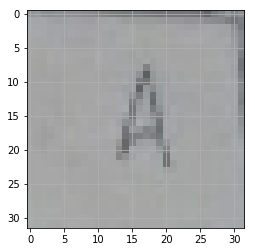

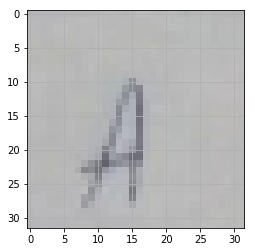

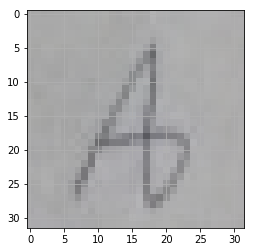

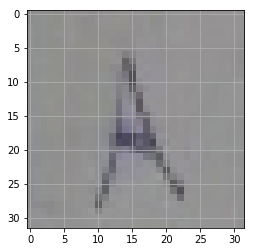

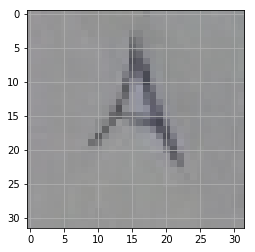

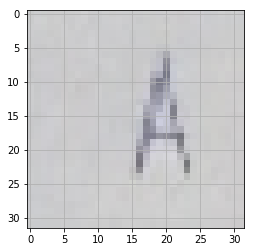

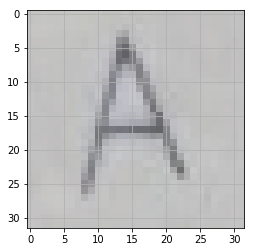

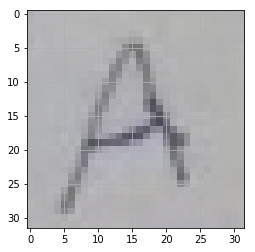

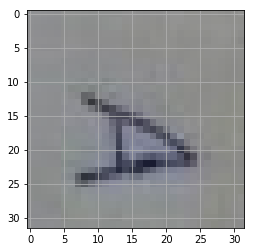

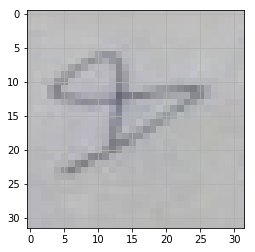

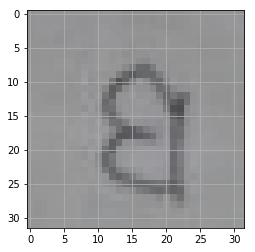

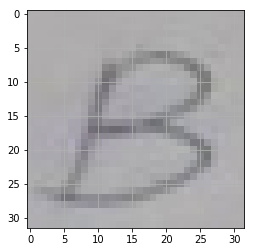

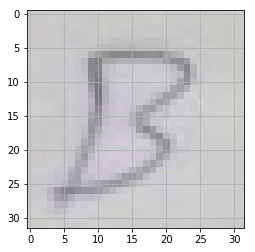

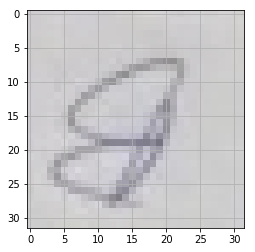

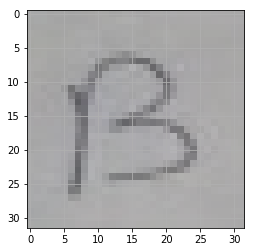

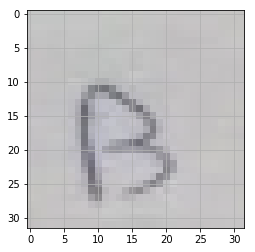

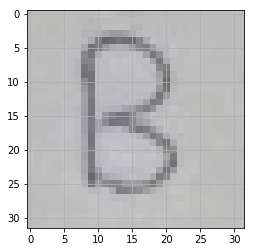

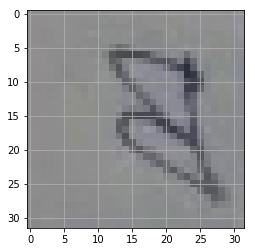

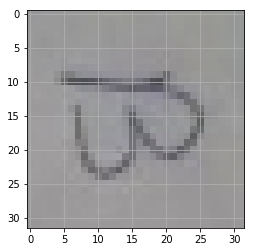

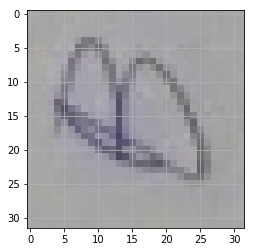

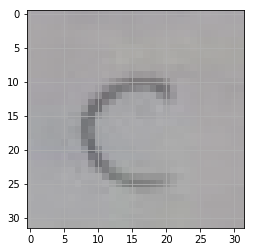

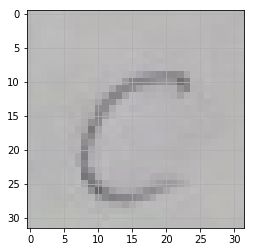

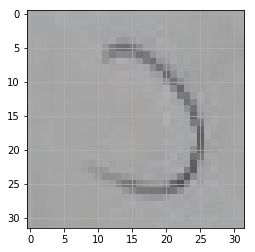

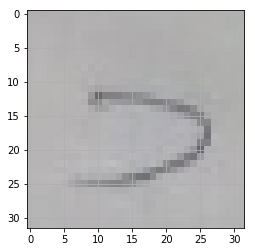

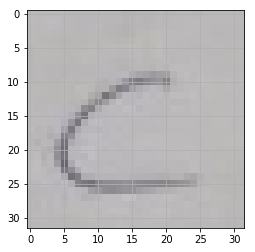

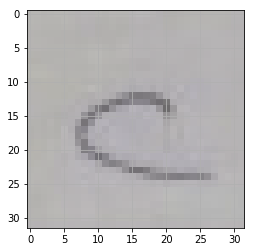

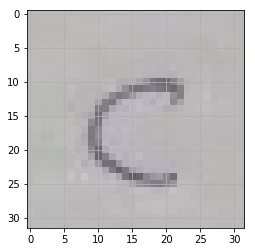

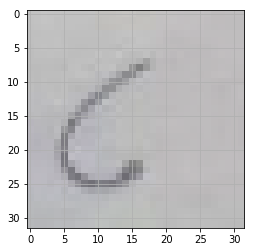

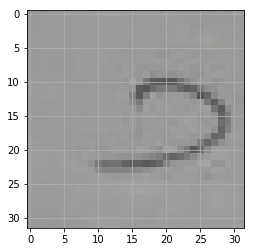

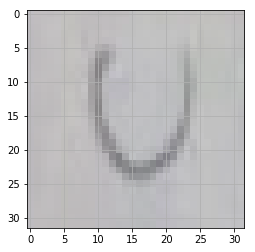

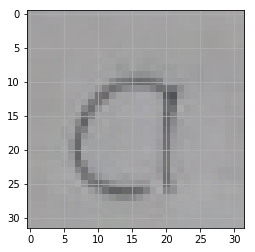

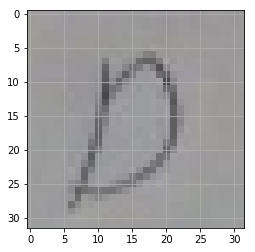

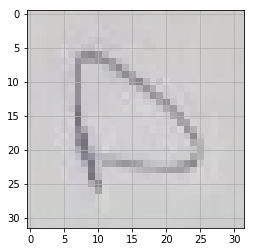

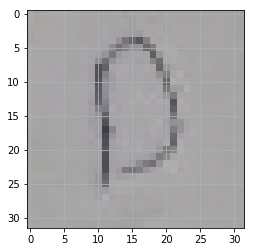

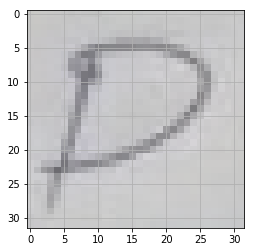

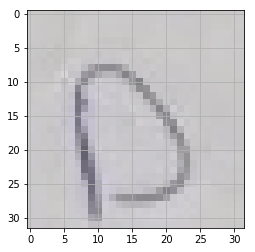

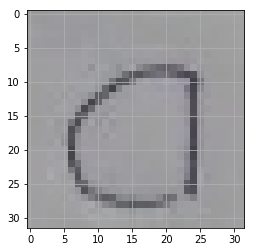

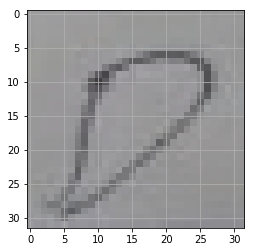

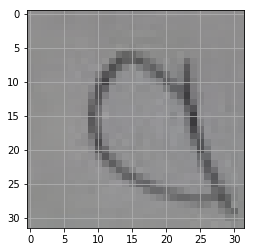

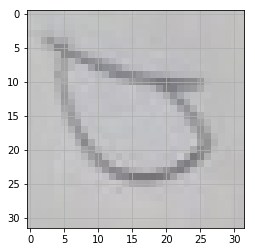

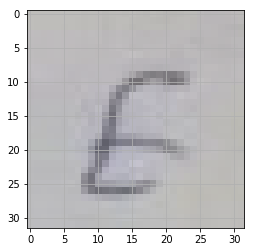

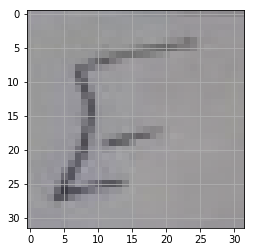

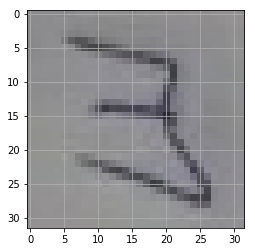

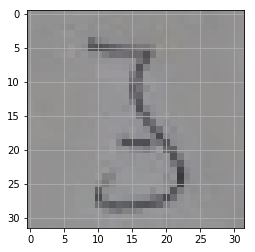

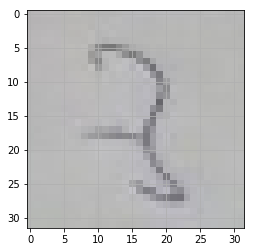

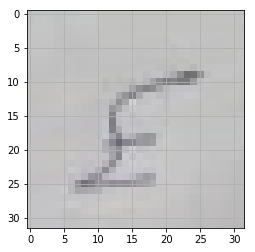

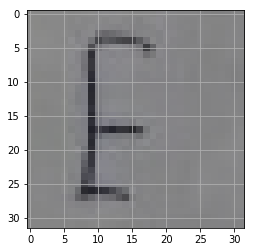

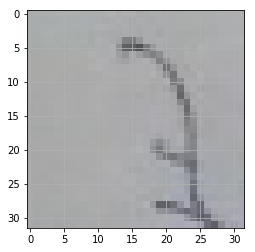

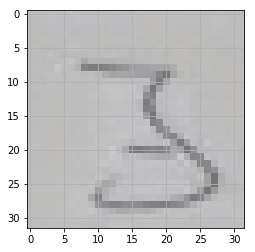

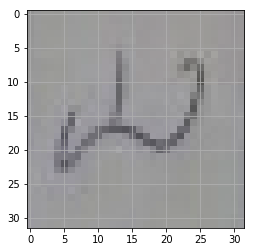

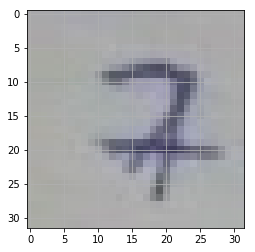

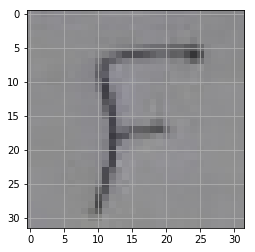

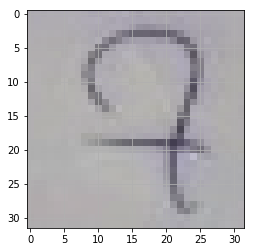

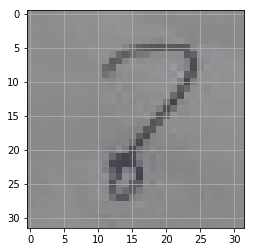

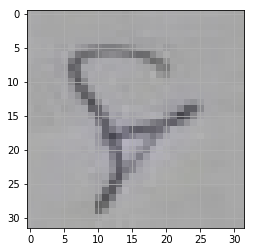

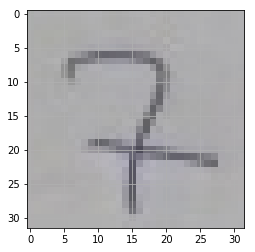

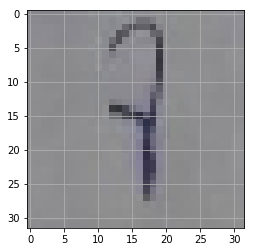

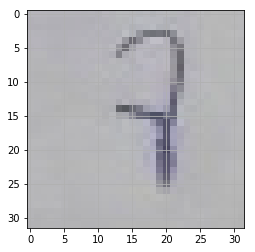

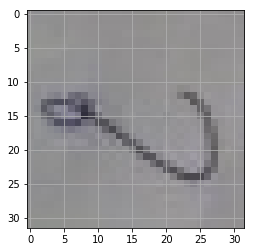

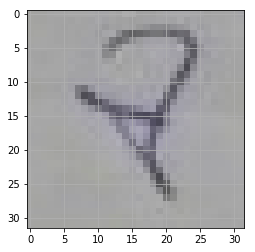

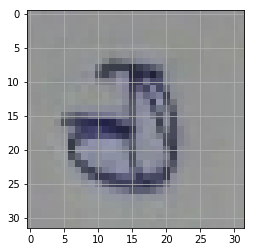

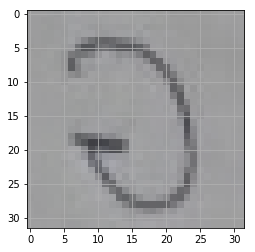

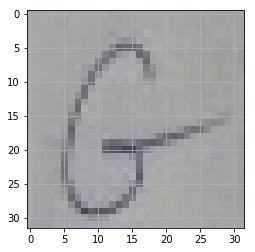

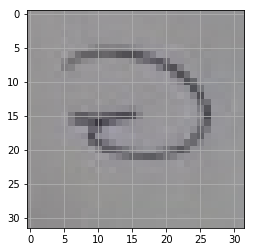

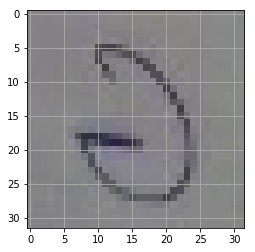

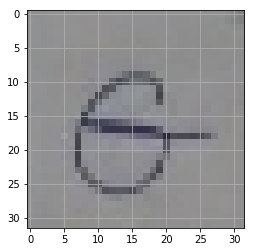

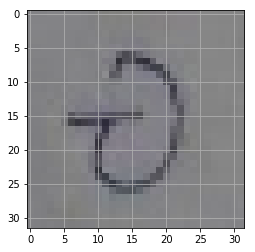

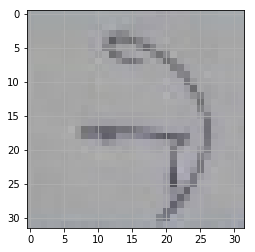

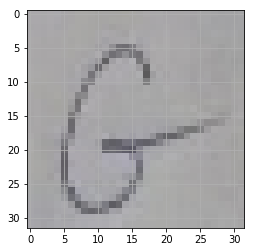

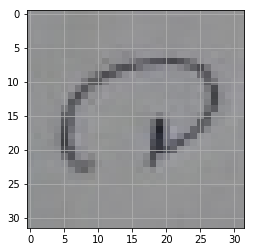

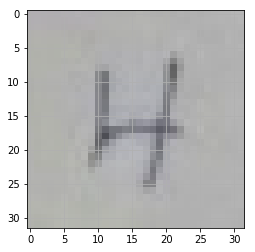

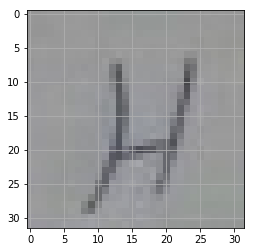

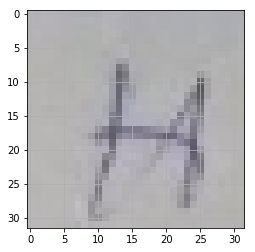

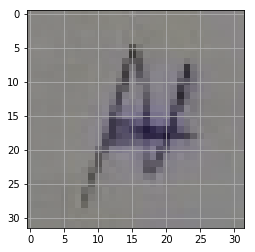

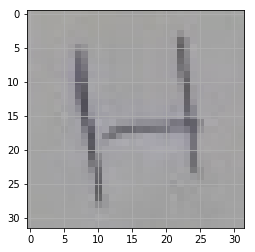

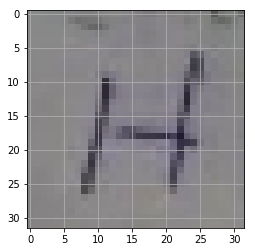

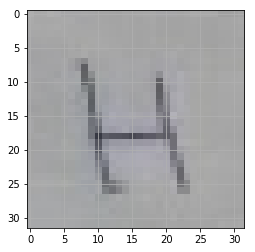

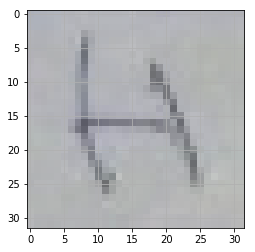

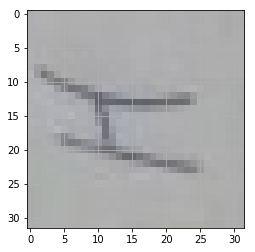

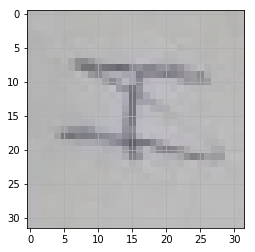

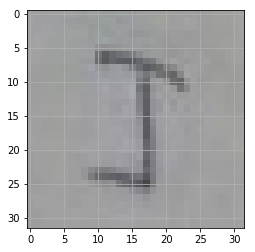

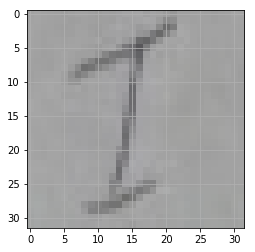

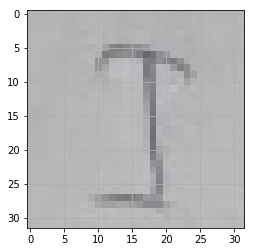

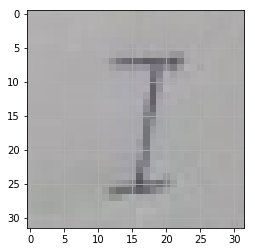

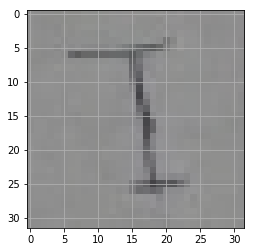

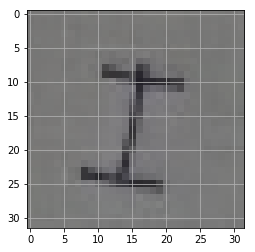

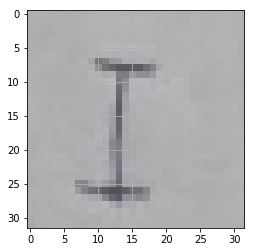

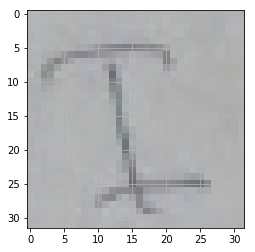

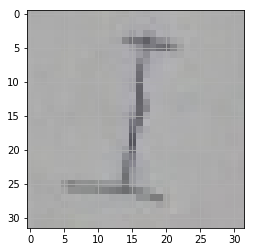

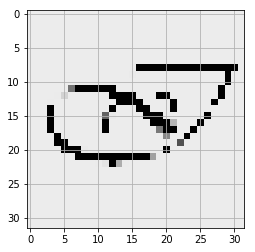

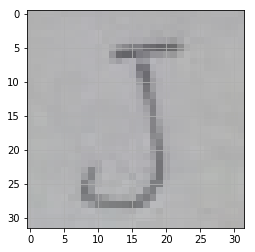

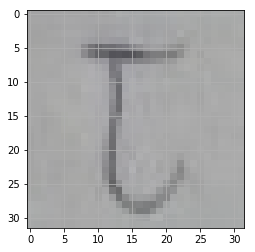

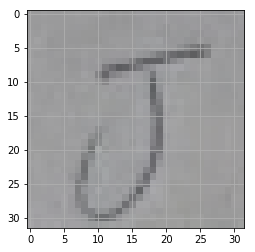

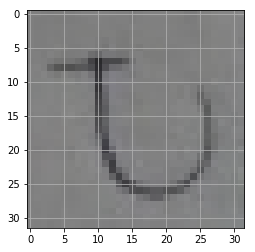

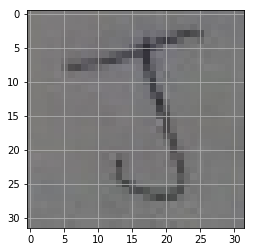

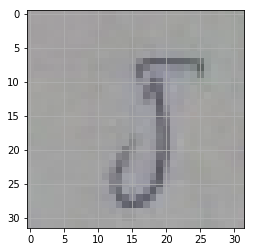

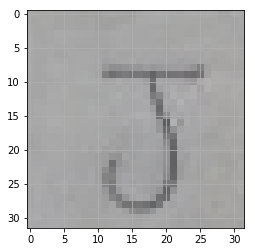

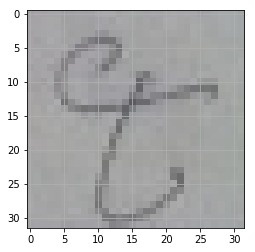

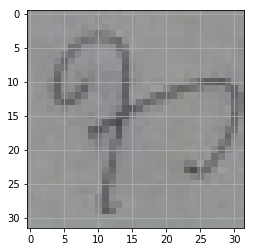

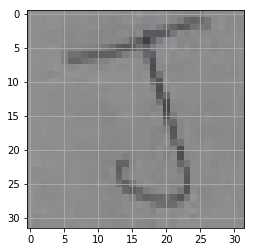

In [12]:
for i in range(len(filenames)):
    plt.figure()
    plt.imshow(X[i])
    plt.grid()
    #plt.imshow(filenames)
    #plt.show()